<a href="https://colab.research.google.com/github/cleber-abreu/trilha-datascience-serpro/blob/master/Estatistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Estatistica Descritiva

Baixando o arquivo referente aos gastos com Cartão Coportativo Julho/2018

In [0]:
!wget 'http://www.portaltransparencia.gov.br/download-de-dados/cpgf/201807' -O CPGF.zip

--2020-05-28 13:53:57--  http://www.portaltransparencia.gov.br/download-de-dados/cpgf/201807
Resolving www.portaltransparencia.gov.br (www.portaltransparencia.gov.br)... 189.16.231.239
Connecting to www.portaltransparencia.gov.br (www.portaltransparencia.gov.br)|189.16.231.239|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 251481 (246K) [text/csv]
Saving to: ‘CPGF.zip’

CPGF.zip            100%[===================>] 245.59K   220KB/s    in 1.1s    

2020-05-28 13:53:59 (220 KB/s) - ‘CPGF.zip’ saved [251481/251481]



Lendo os dados do CSV e carregando no DataFrame do Pandas

In [0]:
import pandas as pd

dados_cpgf = pd.read_csv('CPGF.zip', compression="zip", encoding = "ISO-8859-1", sep=';')

In [0]:
dados_cpgf.head()

,CÓDIGO ÓRGÃO SUPERIOR,NOME ÓRGÃO SUPERIOR,CÓDIGO ÓRGÃO,NOME ÓRGÃO,CÓDIGO UNIDADE GESTORA,NOME UNIDADE GESTORA,ANO EXTRATO,MÊS EXTRATO,CPF PORTADOR,NOME PORTADOR,CNPJ OU CPF FAVORECIDO,NOME FAVORECIDO,TRANSAÇÃO,DATA TRANSAÇÃO,VALOR TRANSAÇÃO
0,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110096,SUPERINTENDENCIA ADMINISTRACAO EM PERNAMBUCO,2018,7,***.562.794-**,FABIO NOBRE CALIFE,7352932000142,JOAO BOSCO DA SILVA - LAVANDERIA,COMPRA A/V - R$ - APRES,01/06/2018,"100,00"
1,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110096,SUPERINTENDENCIA ADMINISTRACAO EM PERNAMBUCO,2018,7,***.562.794-**,FABIO NOBRE CALIFE,35519545000193,ATACADO DA CONSTRUCAO LTDA,COMPRA A/V - R$ - APRES,30/05/2018,"49,95"
2,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110096,SUPERINTENDENCIA ADMINISTRACAO EM PERNAMBUCO,2018,7,***.349.600-**,RODRIGO D AVILA DE OLIVEIRA,12845236000108,INCOMEL COMERCIO DE MATERIAIS ELETRICOS LTDA,COMPRA A/V - R$ - APRES,01/06/2018,"577,73"
3,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110096,SUPERINTENDENCIA ADMINISTRACAO EM PERNAMBUCO,2018,7,***.455.455-**,SANDRA MARIA DA ROCHA NASCIMENTO,3598443000114,SANTOS & XAVIER LTDA,COMPRA A/V - R$ - APRES,04/06/2018,"450,00"
4,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110096,SUPERINTENDENCIA ADMINISTRACAO EM PERNAMBUCO,2018,7,***.349.600-**,RODRIGO D AVILA DE OLIVEIRA,12845236000108,INCOMEL COMERCIO DE MATERIAIS ELETRICOS LTDA,COMPRA A/V - R$ - APRES,01/06/2018,"14,48"


Removendo as colunas desnecessárias

In [0]:
dados_cpgf = dados_cpgf.drop(columns=[ 'CÓDIGO ÓRGÃO SUPERIOR', 
                 'CÓDIGO ÓRGÃO', 
                 'CÓDIGO UNIDADE GESTORA', 
                 'ANO EXTRATO', 
                 'MÊS EXTRATO', 
                 'CPF PORTADOR', 
                 'CNPJ OU CPF FAVORECIDO'])

dados_cpgf.head()

,NOME ÓRGÃO SUPERIOR,NOME ÓRGÃO,NOME UNIDADE GESTORA,NOME PORTADOR,NOME FAVORECIDO,TRANSAÇÃO,DATA TRANSAÇÃO,VALOR TRANSAÇÃO
0,Advocacia-Geral da União,Advocacia-Geral da União - Unidades com víncul...,SUPERINTENDENCIA ADMINISTRACAO EM PERNAMBUCO,FABIO NOBRE CALIFE,JOAO BOSCO DA SILVA - LAVANDERIA,COMPRA A/V - R$ - APRES,01/06/2018,"100,00"
1,Advocacia-Geral da União,Advocacia-Geral da União - Unidades com víncul...,SUPERINTENDENCIA ADMINISTRACAO EM PERNAMBUCO,FABIO NOBRE CALIFE,ATACADO DA CONSTRUCAO LTDA,COMPRA A/V - R$ - APRES,30/05/2018,"49,95"
2,Advocacia-Geral da União,Advocacia-Geral da União - Unidades com víncul...,SUPERINTENDENCIA ADMINISTRACAO EM PERNAMBUCO,RODRIGO D AVILA DE OLIVEIRA,INCOMEL COMERCIO DE MATERIAIS ELETRICOS LTDA,COMPRA A/V - R$ - APRES,01/06/2018,"577,73"
3,Advocacia-Geral da União,Advocacia-Geral da União - Unidades com víncul...,SUPERINTENDENCIA ADMINISTRACAO EM PERNAMBUCO,SANDRA MARIA DA ROCHA NASCIMENTO,SANTOS & XAVIER LTDA,COMPRA A/V - R$ - APRES,04/06/2018,"450,00"
4,Advocacia-Geral da União,Advocacia-Geral da União - Unidades com víncul...,SUPERINTENDENCIA ADMINISTRACAO EM PERNAMBUCO,RODRIGO D AVILA DE OLIVEIRA,INCOMEL COMERCIO DE MATERIAIS ELETRICOS LTDA,COMPRA A/V - R$ - APRES,01/06/2018,"14,48"


Convertendo coluna `'DATA TRANSAÇÃO'` para o tipo data

In [0]:
dados_cpgf['DATA TRANSAÇÃO'] = pd.to_datetime(dados_cpgf['DATA TRANSAÇÃO'])

Convertendo coluna `'VALOR TRANSAÇÃO'` para tipo númerico



In [0]:
dados_cpgf['VALOR TRANSAÇÃO'] = dados_cpgf['VALOR TRANSAÇÃO'].str.replace(',', '.', 1)
dados_cpgf['VALOR TRANSAÇÃO'] = pd.to_numeric(dados_cpgf['VALOR TRANSAÇÃO'])

In [0]:
dados_cpgf.head()

,NOME ÓRGÃO SUPERIOR,NOME ÓRGÃO,NOME UNIDADE GESTORA,NOME PORTADOR,NOME FAVORECIDO,TRANSAÇÃO,DATA TRANSAÇÃO,VALOR TRANSAÇÃO
0,Advocacia-Geral da União,Advocacia-Geral da União - Unidades com víncul...,SUPERINTENDENCIA ADMINISTRACAO EM PERNAMBUCO,FABIO NOBRE CALIFE,JOAO BOSCO DA SILVA - LAVANDERIA,COMPRA A/V - R$ - APRES,2018-01-06,100.00
1,Advocacia-Geral da União,Advocacia-Geral da União - Unidades com víncul...,SUPERINTENDENCIA ADMINISTRACAO EM PERNAMBUCO,FABIO NOBRE CALIFE,ATACADO DA CONSTRUCAO LTDA,COMPRA A/V - R$ - APRES,2018-05-30,49.95
2,Advocacia-Geral da União,Advocacia-Geral da União - Unidades com víncul...,SUPERINTENDENCIA ADMINISTRACAO EM PERNAMBUCO,RODRIGO D AVILA DE OLIVEIRA,INCOMEL COMERCIO DE MATERIAIS ELETRICOS LTDA,COMPRA A/V - R$ - APRES,2018-01-06,577.73
3,Advocacia-Geral da União,Advocacia-Geral da União - Unidades com víncul...,SUPERINTENDENCIA ADMINISTRACAO EM PERNAMBUCO,SANDRA MARIA DA ROCHA NASCIMENTO,SANTOS & XAVIER LTDA,COMPRA A/V - R$ - APRES,2018-04-06,450.00
4,Advocacia-Geral da União,Advocacia-Geral da União - Unidades com víncul...,SUPERINTENDENCIA ADMINISTRACAO EM PERNAMBUCO,RODRIGO D AVILA DE OLIVEIRA,INCOMEL COMERCIO DE MATERIAIS ELETRICOS LTDA,COMPRA A/V - R$ - APRES,2018-01-06,14.48


Atribuindo diferentes cores aos valores da coluna `'ÓRGÃO SUPERIOR'`


In [0]:
import seaborn as sns

# Gerando amostra.
# Resolvi fazer com uma amostra menor para facilicar a visualização
amostra = dados_cpgf.sample(frac=.05)

# identificação dos orgãos
c = pd.Categorical(amostra['NOME ÓRGÃO SUPERIOR']).codes

# quantidade de orgãos
n = amostra['NOME ÓRGÃO SUPERIOR'].unique().size

# gerando paleta de cores
palette = sns.color_palette("hls", n).as_hex()

amostra.style.apply(
    lambda x: ['background-color: {}'.format(palette[i]) for i in c], 
    subset=['NOME ÓRGÃO SUPERIOR']
)

,NOME ÓRGÃO SUPERIOR,NOME ÓRGÃO,NOME UNIDADE GESTORA,NOME PORTADOR,NOME FAVORECIDO,TRANSAÇÃO,DATA TRANSAÇÃO,VALOR TRANSAÇÃO
8025,Ministério da Infraestrutura,Agência Nacional de Transportes Aquaviários,AGENCIA NACIONAL DE TRANSPORTES AQUAVIARIOS,PAULO SERGIO DA SILVA CUNHA,SEM INFORMACAO,COMPRA A/V - R$ - APRES,2018-06-13 00:00:00,400.000000
1472,"Ministério da Ciência, Tecnologia, Inovações","Ministério da Ciência, Tecnologia, Inovações e Comunicações - Unidades com vínculo direto",CENTRO DE TECN. DA INF. RENATO ARCHER - CTI,MARCIO TAROZZO BIASOLI,AZUL LINHAS AEREAS BRASILEIRAS S.A.,COMPRA A/V - R$ - APRES,2018-01-06 00:00:00,1186.300000
2314,Ministério da Defesa,Comando do Exército,COMANDO 5ª REGIÃO MILITAR,THOMAZ JEFFERSON FERREIRA PINTO,AZUL LINHAS AEREAS BRASILEIRAS S.A.,COMPRA A/V - R$ - APRES,2018-07-06 00:00:00,819.620000
6267,Ministério da Educação,Empresa Brasileira de Serviços Hospitalares,EBSERH MEJC-UFRN,JOSE EDIVAN DA SILVA ABREU,JOSE MIGUEL DA CRUZ,COMPRA A/V - R$ - APRES,2018-05-30 00:00:00,480.000000
5850,Ministério da Economia,Ministério da Economia - Unidades com vínculo direto,SUPERINTENDENCIA REGIONAL DA RFB NA 4A RF,JOAO JOSE DA SILVA,"MA COMERCIO, REPARACAO E MANUTENCAO DE PRODUTOS E EQUIPAMENTOS DE TELEFONIA E COMUNICACAO EIRELI",COMPRA A/V - R$ - APRES,2018-12-06 00:00:00,230.000000
4928,Ministério da Economia,Fundação Instituto Brasileiro de Geografia e Estatística,UNIDADE ESTADUAL DO IBGE NO PARANA,LEONARDO HENRIQUE SANTOS TULIO,SUPERMERCADO ROLIM LTDA,COMPRA A/V - R$ - APRES,2018-06-19 00:00:00,69.940000
3616,Ministério da Economia,Fundação Instituto Brasileiro de Geografia e Estatística,UNIDADE ESTADUAL DO IBGE EM SAO PAULO,APARECIDA TAVARES LINS,NAO SE APLICA,SAQUE CASH/ATM BB,2018-04-06 00:00:00,160.000000
3306,Ministério da Economia,Fundação Instituto Brasileiro de Geografia e Estatística,UNIDADE ESTADUAL DO IBGE EM SANTA CATARINA,SERGIO HIDEITI SHIMIZU,CONRAD PIAS & CIA LTDA,COMPRA A/V - R$ - APRES,2018-06-16 00:00:00,212.570000
3364,Ministério da Economia,Fundação Instituto Brasileiro de Geografia e Estatística,UNIDADE ESTADUAL DO IBGE EM SANTA CATARINA,ALCEMIR LAMB,NAO SE APLICA,SAQUE CASH/ATM BB,2018-01-06 00:00:00,300.000000
2932,Ministério da Economia,Fundação Instituto Brasileiro de Geografia e Estatística,FUNDACAO IBGE-ADMINISTRACAO CENTRAL/RJ,GIOVANNA ALTOMARE CATAO,REFRISUMMER COMERCIO DE REFRIGERACAO LTDA,COMPRA A/V - R$ - APRES,2018-05-28 00:00:00,772.900000


Estatística

In [0]:
dados_cpgf.describe(include='all')

,NOME ÓRGÃO SUPERIOR,NOME ÓRGÃO,NOME UNIDADE GESTORA,NOME PORTADOR,NOME FAVORECIDO,TRANSAÇÃO,DATA TRANSAÇÃO,VALOR TRANSAÇÃO
count,11260,11260,11260,11260,11260,11260,9521,11260.000000
unique,17,152,704,2274,4211,5,34,NaN
top,Ministério da Economia,Fundação Instituto Brasileiro de Geografia e E...,UNIDADE ESTADUAL DO IBGE EM SAO PAULO,Sigiloso,Sigiloso,COMPRA A/V - R$ - APRES,2018-06-21 00:00:00,NaN
freq,3399,2329,403,1739,1739,7838,614,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-06 00:00:00,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2018-12-06 00:00:00,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,358.208194
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,931.166916
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.102500


In [0]:
dados_cpgf['VALOR TRANSAÇÃO'].skew()

18.13710313092717

In [0]:
dados_cpgf['VALOR TRANSAÇÃO'].kurtosis()

404.36941301259196

Visualizar gráfico de valor total por órgão superior

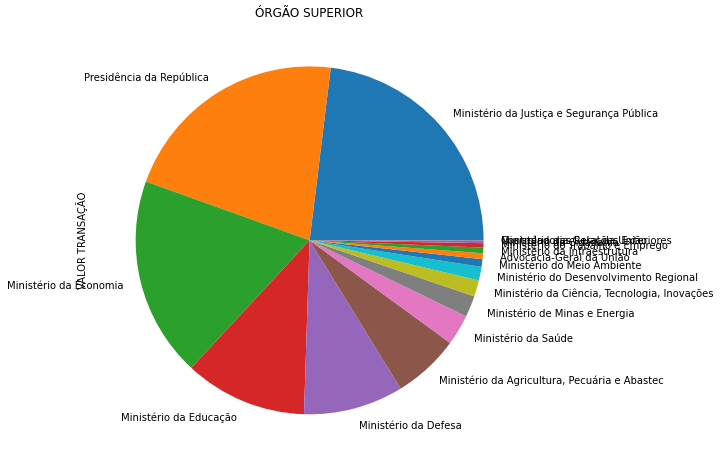

In [0]:
import matplotlib.pyplot as plt

dados_cpgf.groupby('NOME ÓRGÃO SUPERIOR')['VALOR TRANSAÇÃO'].sum().sort_values(ascending=False).plot(
    kind='pie', 
    title='ÓRGÃO SUPERIOR',
    figsize=(8,8))
plt.show()

Visualizar histograma de valor total por órgão superior


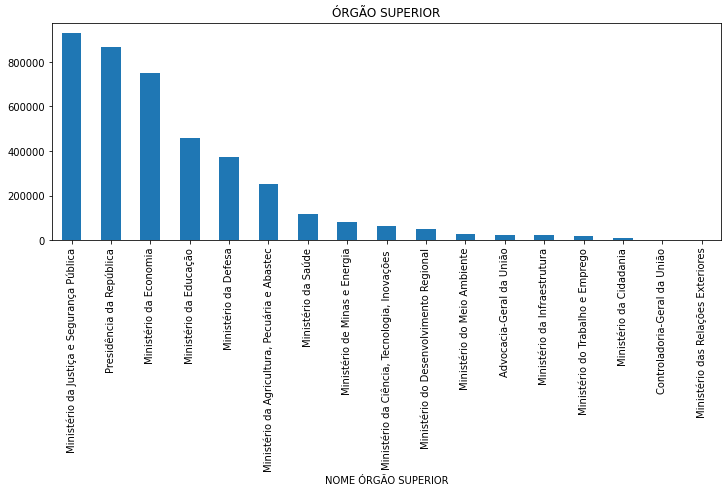

In [0]:
dados_cpgf.groupby('NOME ÓRGÃO SUPERIOR')['VALOR TRANSAÇÃO'].sum().sort_values(ascending=False).plot(
    kind='bar', 
    title='ÓRGÃO SUPERIOR',
    figsize=(12,4))
plt.show()

# Teste de Hipótese

Filtrando os registros cujo valor de coluna `"NOME ÓRGÃO"` seja `"DEPARTAMENTO NACIONAL DE PRODUCAO MINERAL"`

In [0]:
dados_dnpm = dados_cpgf[dados_cpgf['NOME ÓRGÃO'].str.lower() == "departamento nacional de produção mineral"]

Amostra de 50 registros da base estratificada pela coluna `"NOME UNIDADE GESTORA"`, com seed igual a 3 para reprodução exata dos resultados

In [0]:
amostra_dnpm = amostra.sample(n=50, random_state=3)

**Teste:** 

Uma pessoa afirma que o gasto médio por transação com cartão corporativo do órgão "DEPARTAMENTO NACIONAL DE PRODUCAO MINERAL" no mês de Junho/2018 (extração de Julho/2018) foi acima de R$ 140. 

Com a amostra acima, é possível dizer que a afirmação é verdadeira com uma confiança estatística de 95%? (realizar teste-t de uma única amostra)

In [0]:
amostra_dnpm.describe()

,VALOR TRANSAÇÃO
count,50.000000
mean,414.147200
std,400.505928
min,29.520000
25%,130.445000
50%,222.150000
75%,574.352500
max,1761.640000


In [0]:
from scipy.stats import ttest_1samp
ttest_1samp(amostra_dnpm['VALOR TRANSAÇÃO'], 140)

Ttest_1sampResult(statistic=4.840161666791067, pvalue=1.3353872629355755e-05)